# Simple Linear Regression for Amazon Stock Price 2017

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


In [2]:
df = pd.read_csv("AMZN.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,07-08-2017,49.532501,49.750000,49.356998,49.613499,49.613499,53532000,AMZN
1,08-08-2017,49.717499,49.813999,49.289501,49.492001,49.492001,58056000,AMZN
2,09-08-2017,49.130001,49.400002,48.763500,49.100498,49.100498,71394000,AMZN
3,10-08-2017,48.814999,48.993000,47.734001,47.846001,47.846001,113682000,AMZN
4,11-08-2017,48.000000,48.519501,47.569000,48.399502,48.399502,69360000,AMZN


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,115.140131,116.471413,113.665197,115.085707,115.085707,8.635700e+07
std,39.812466,40.289989,39.271643,39.740498,39.740498,4.103139e+07
min,47.000000,47.431499,46.587502,46.930000,46.930000,1.762600e+07
25%,85.279999,86.250000,84.272123,85.251121,85.251121,5.874200e+07
50%,98.553501,99.781250,97.534000,98.735001,98.735001,7.470900e+07
75%,158.346878,159.930752,156.224998,158.093746,158.093746,1.022860e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.313000e+08


In [4]:
cdf = df[['Open','High','Low','Close']]
cdf.head(9)

,Open,High,Low,Close
0,49.532501,49.750000,49.356998,49.613499
1,49.717499,49.813999,49.289501,49.492001
2,49.130001,49.400002,48.763500,49.100498
3,48.814999,48.993000,47.734001,47.846001
4,48.000000,48.519501,47.569000,48.399502
5,48.920502,49.275002,48.809502,49.165001
6,49.445000,49.587002,49.099998,49.137001
7,49.082500,49.323002,48.660999,48.909000
8,48.891998,48.891998,48.015999,48.028500


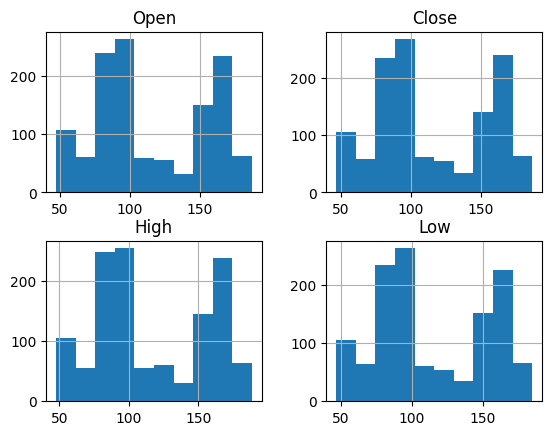

In [6]:
viz = cdf[['Open','Close','High','Low']]
viz.hist()
plt.show()

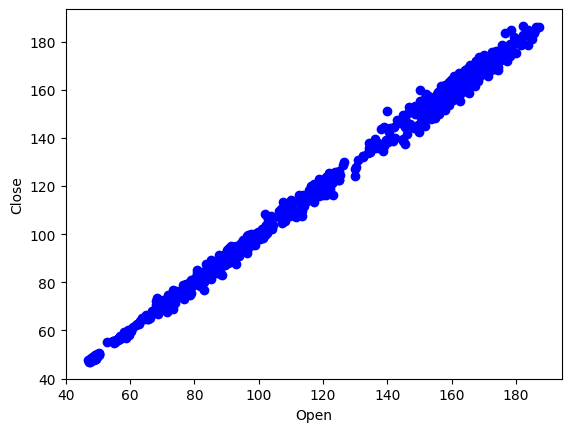

In [9]:
plt.scatter(cdf.Open, cdf.Close,  color='blue')
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

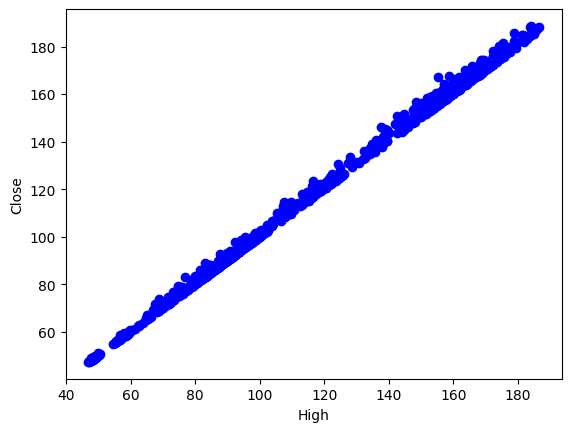

In [10]:
plt.scatter(cdf.Close, cdf.High,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

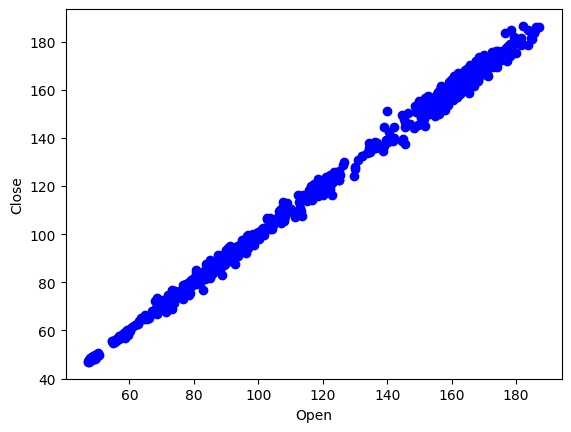

In [12]:
plt.scatter(train.Open, train.Close,  color='blue')
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Open']])
train_y = np.asanyarray(train[['Close']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.99767903]]
Intercept:  [0.21917231]


Text(0, 0.5, 'Close')

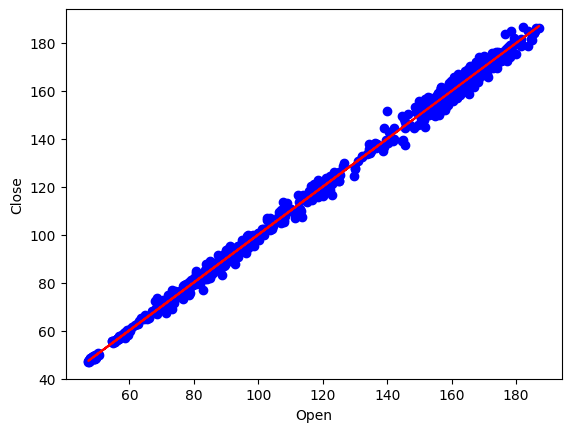

In [15]:
plt.scatter(train.Open, train.Close,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Open")
plt.ylabel("Close")

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Open']])
test_y = np.asanyarray(test[['Close']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1.62
Residual sum of squares (MSE): 5.19
R2-score: 1.00
